In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from collections import Counter

# sklearn #from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# sklearn metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from xgboost import XGBClassifier

# eli5
from eli5.sklearn import PermutationImportance
from matplotlib.legend_handler import HandlerLine2D

# imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline

from inspect import signature




import os

os.chdir('D:/Meus documentos/Trabalhos/python/exercicios/exemplaria/turma-2019-1/data/raw/')
print('LOCAL DE DATABASES')
print()
print(os.getcwd())
print()
print('LISTA DE DATABASES \n\n -', end ='')
print(*os.listdir(), sep = '\n -')

Using TensorFlow backend.


LOCAL DE DATABASES

D:\Meus documentos\Trabalhos\python\exercicios\exemplaria\turma-2019-1\data\raw

LISTA DE DATABASES 

 -amostra_benchmark_20170930.csv
 -anatel_exemplaria.csv
 -anatel_utf8.csv
 -benchmark_20170930_exemplaria.csv
 -benchmark_20171105_exemplaria.csv
 -cliente_cobranca_multas_fidelizacao_201709_201801_encrypted.csv
 -cliente_ebill_201709_201801_encrypted.csv
 -consumidor_gov_exemplaria.csv
 -count_plot.png
 -jec_exemplaria.csv
 -nextel_test.csv
 -premissas_base_fidelizados_201709_201801_encrypted.csv
 -PREMISSAS_BASE_FRANQUIA_20170701_20181231.csv
 -PREMISSAS_BASE_REDE_VIVO_20170901_20171231.csv
 -premissas_customer_exemplaria.csv
 -procon_exemplaria.csv
 -procon_exemplaria_v2.csv
 -ricardo_jec_processo_v2_csv_encrypted.csv
 -sample.csv


# 1) Filtrar os usuários reclamantes por cpf e cnpj


- Extração de dados das planilhas

-- filtrar os usuários por número de **contrato** ao invés de cpf e cnpj

In [2]:
#ricardo_jec_processo_v2_csv_encrypted
#cliente_cobranca_multas_fidelizacao_201709_201801_encrypted
#cliente_ebill_201709_201801_encrypted
#premissas_customer_exemplaria
#premissas_base_fidelizados_201709_201801_encrypted
#PREMISSAS_BASE_FRANQUIA_20170701_20181231
#PREMISSAS_BASE_REDE_VIVO_20170901_20171231

# path
jec_exemplaria = 'jec_exemplaria.csv'
anatel_exemplaria = 'anatel_utf8.csv'
consumidor_gov_exemplaria = 'consumidor_gov_exemplaria.csv'
procon_exemplaria = 'procon_exemplaria_v2.csv'

benchmark = 'benchmark_20171105_exemplaria.csv'
benchmark2 = 'benchmark_20170930_exemplaria.csv'

* **Usuarios jec_exemplaria**

In [3]:
# set df
df_jec_exemplaria = pd.read_csv(jec_exemplaria, sep=';', low_memory=False)

# separate columns
df_jec_exemplaria = df_jec_exemplaria[['cpf_cnpj_autor_encrypted']]

#print(df_jec_exemplaria.to_string())
df_jec_exemplaria

,cpf_cnpj_autor_encrypted
0,-8278895064444567583
1,-8278895064444567583
2,-7103211938884760171
3,-7103211938884760171
4,2584592307964668520
...,...
58790,-5768500093829343439
58791,-8802084936976741040
58792,-8802084936976741040
58793,-7588558702187685792


* **Usuarios df_anatel_exemplaria**

Este DF usuarios cadastrados como **cpf** e **cnpj** em colunas separadas, sendo assim juntei eles em apenas uma coluna e no final padronizei as colunas como **'cpf_cnpj_autor_encrypted'** e **'data_abertura'**

In [4]:
# set df
df_anatel_exemplaria = pd.read_csv(anatel_exemplaria, low_memory=False)

# separate columns
df_anatel_exemplaria = df_anatel_exemplaria[['cpfusuario_encrypted', 
                                             'cnpjusuario_encrypted']]


# merge cpf and cnpj unsing ***replace***
df_anatel_exemplaria['cpfusuario_encrypted'] = df_anatel_exemplaria['cpfusuario_encrypted'].\
                                               replace(717768040883963444, 
                                                       df_anatel_exemplaria['cnpjusuario_encrypted'])

# removing cnpjusuario_encrypted column
df_anatel_exemplaria = df_anatel_exemplaria.drop(['cnpjusuario_encrypted'], axis=1)

# rename columns
df_anatel_exemplaria  = df_anatel_exemplaria.rename(columns={'cpfusuario_encrypted' : 'cpf_cnpj_autor_encrypted'})

# head
df_anatel_exemplaria
#df_anatel_exemplaria.iloc[10:16]

,cpf_cnpj_autor_encrypted
0,-5441657587252619963
1,-3134406927080996569
2,-8474775423441576983
3,4878597757205818211
4,-4148533849307574754
...,...
26650,-8841887153794893028
26651,1373809106627248313
26652,8381582281825252345
26653,777835583064737189


* **Usuarios df_consumidor_gov_exemplaria**

Padronizei as colunas como 'cpf_cnpj_autor_encrypted' e 'data_abertura'

In [5]:
# set df
df_consumidor_gov_exemplaria = pd.read_csv(consumidor_gov_exemplaria, sep=';', header=0)

# separate columns
df_consumidor_gov_exemplaria = df_consumidor_gov_exemplaria[['consumidor_encrypted']]

# rename columns
df_consumidor_gov_exemplaria = df_consumidor_gov_exemplaria.\
                               rename(columns={'consumidor_encrypted' : 'cpf_cnpj_autor_encrypted'})

# head
df_consumidor_gov_exemplaria

,cpf_cnpj_autor_encrypted
0,-4794237001834406403
1,1325398072190658566
2,8058470283630806326
3,749007811995129604
4,1506815736802147118
...,...
1350,-364624387379906309
1351,-3609852661136971045
1352,2443212810582077002
1353,-1828705113066783334


* **Usuarios df_procon_exemplaria**

Neste DF eu retirei a informação de horas da coluna 'data_cadastro' e no final padronizei as colunas como 'cpf_cnpj_autor_encrypted' e 'data_abertura'

In [6]:
# set df
df_procon_exemplaria = pd.read_csv(procon_exemplaria, sep=';', header=0)

# separate columns
df_procon_exemplaria = df_procon_exemplaria[['cpf_cnpj_autor_encrypted']]
    
# rename columns
df_procon_exemplaria = df_procon_exemplaria.rename(columns={'cpf_cnpj_autor_encrypted' : 'cpf_cnpj_autor_encrypted'})

# head
df_procon_exemplaria

,cpf_cnpj_autor_encrypted
0,3595612307182592274
1,6780540249508724678
2,6650217391022818086
3,-5414531453164723086
4,8178896068058127343
...,...
2176,3244676038436254291
2177,6059362184047295199
2178,8871408721049412240
2179,-1171559400676203392


* **Reunião dos databases**

In [7]:
df_list = [df_jec_exemplaria, df_anatel_exemplaria, df_consumidor_gov_exemplaria, df_procon_exemplaria]
df_complainers = pd.concat(df_list, ignore_index=True)

# drop the duplicate rows
df_complainers = df_complainers.drop_duplicates()
df_complainers = df_complainers.reset_index()
df_complainers = df_complainers.drop(['index'], axis=1)

df_complainers

,cpf_cnpj_autor_encrypted
0,-8278895064444567583
1,-7103211938884760171
2,2584592307964668520
3,-683452522137655996
4,-155693771024153410
...,...
29796,3244676038436254291
29797,6059362184047295199
29798,8871408721049412240
29799,-1171559400676203392


# 2) Linkar os databases com o benchmark com as features

# Amostra de dados da base benchmark

chunk:

https://hakin9.org/why-and-how-to-use-pandas-with-large-data-by-admond-lee/

https://wiki.mylesb.ca/programming/python/pandas.html#snippets

In [8]:
#list_clients = [[benchmark, benchmark2]]
list_clients = [benchmark]

In [9]:
client_chunks = []

def benchmark_reader(list_clients, client_chunks):
    for file in list_clients:

            df_clients = pd.read_csv(file, sep = ";", 
                                     header = 0, 
                                     index_col = False, 
                                     names = None, 
                                     low_memory = False, 
                                     chunksize = 10**5) 

            for chunk in df_clients:

                new_clients = pd.DataFrame(chunk)

                # filter data chunk with frac percentage
                new_clients = new_clients.sample(frac = 0.045)

                # saves to list
                client_chunks.append(new_clients)

    clients = pd.concat(client_chunks).reset_index(drop = True)

    return clients

In [10]:
#clients = benchmark_reader(list_clients, client_chunks)

In [11]:
#clients

# Salvar no arquivo checkpoint #1

Precisa salvar apenas uma vez, depois comentar o codigo abaixo para não processar tudo de novo

In [12]:
# save in the file
filename = '../intermediate/sample.csv'
#clients.to_csv(filename, index=False)
print('Saved file: ' + filename)

Saved file: ../intermediate/sample.csv


# Carregar arquivo

In [13]:
# reading file
clients_sample = pd.read_csv(filename, low_memory=False)

In [14]:
clients_sample

,contract_code,cssocialsecno_encrypted,customer_tenure,port_in_flag,person_type,payment_method,rate_plan_code,rate_plan,inar_rate_plan,rateplan_fee,...,bytes_used_m2,bytes_used_m1,bytes_used_m0,bytes_exceeded_m5,bytes_exceeded_m4,bytes_exceeded_m3,bytes_exceeded_m2,bytes_exceeded_m1,bytes_exceeded_m0,contract_loyalty_flag
0,18738726,-3.990137e+18,28.0,NaN,PF,Boleto,2222,Familia Voz+Dados 180/Pós/SMP,Y,33.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17636679,-7.579518e+18,31.0,1.0,PF,Boleto,2276,CTR 1GB+100min 189/Pós/SMP,Y,86.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,19315156,7.493019e+18,13.0,1.0,PF,Boleto,2213,Smart 5GB+500min 178/Pós/SMP,Y,168.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,20323491,-6.766898e+18,31.0,NaN,PF,Boleto,2286,SMART5GB+Ilimitado193/Pós/SMP,Y,129.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,13319432,8.152916e+18,73.0,NaN,PF,Boleto,2250,CTR 2GB+ilimitado 194/PÓS/SMP,Y,89.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126330,16838107,-7.545327e+18,41.0,NaN,PF,Boleto,2124,3G Smart 300P - 027/PÓS/SMP,Y,145.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
126331,18228912,6.684081e+18,20.0,1.0,PF,Debito Automatico,2213,Smart 5GB+500min 178/Pós/SMP,Y,168.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
126332,18908315,-5.391399e+18,15.0,NaN,PF,Debito Automatico,2286,SMART5GB+Ilimitado193/Pós/SMP,Y,129.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
126333,21401066,2.432392e+18,3.0,1.0,PF,Boleto,2250,CTR 2GB+ilimitado 194/PÓS/SMP,Y,89.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


* Link com as features do benchmark

https://docs.google.com/spreadsheets/d/1BFJUHenj_vQC8yS_Vhzoj9hkORohLEPJ/edit#gid=768356393

In [15]:
# features
features = ['contract_code', 'cssocialsecno_encrypted', 'customer_tenure', 'port_in_flag', 'person_type', 
            'payment_method', 'rate_plan_code', 'inar_rate_plan', 'rateplan_fee', 'rateplan_discount_fee', 
            'rateplan_discount_qty', 'services_fee', 'services_discount_fee', 'services_discount_qty', 
            'contract_status', 'contract_status_reason', 'm0_qt_involuntary_suspension', 
            'm1_qt_involuntary_suspension', 'm2_qt_involuntary_suspension', 'm3_qt_involuntary_suspension', 
            'm4_qt_involuntary_suspension', 'm5_qt_involuntary_suspension', 'm0_qt_voluntary_suspension', 
            'm1_qt_voluntary_suspension', 'm2_qt_voluntary_suspension', 'm3_qt_voluntary_suspension', 
            'm4_qt_voluntary_suspension', 'm5_qt_voluntary_suspension', 'm0_rate_plan_amt', 'm0_service_amt', 
            'm1_rate_plan_amt', 'm1_service_amt', 'm2_rate_plan_amt', 'm2_service_amt', 'm3_rate_plan_amt', 
            'm3_service_amt', 'm4_rate_plan_amt', 'm4_service_amt', 'm5_rate_plan_amt', 'm5_service_amt', 
            'nxt_3g_traffic_volume_m0', 
            'nxt_4g_traffic_volume_m0', 'vivo_traffic_volume_m0']

# set features in dataframe
clients_sample = clients_sample[features]

# drop cssocialsecno_encrypted rows that have nan
clients_sample = clients_sample.dropna(subset=['cssocialsecno_encrypted'])

# fill some features that cannot receive fillna mean
clients_sample["port_in_flag"] = clients_sample["port_in_flag"].fillna(0)

In [16]:
def just_check_nan(df):
    # Check NaN Pandas and Numpy
    missing_val_count_by_column = (df.isna().sum())

    columns_with_nan = missing_val_count_by_column[missing_val_count_by_column > 0]
    print('Dados com NaN:')
    print(columns_with_nan)
    print('')
    print('columns_with_nan.shape', columns_with_nan.shape)
    print('')

In [17]:
just_check_nan(clients_sample)

Dados com NaN:
customer_tenure                  1136
rateplan_discount_qty           19283
services_discount_qty           75437
m0_qt_involuntary_suspension    64400
m1_qt_involuntary_suspension    64400
m2_qt_involuntary_suspension    64400
m3_qt_involuntary_suspension    64400
m4_qt_involuntary_suspension    64400
m5_qt_involuntary_suspension    64400
m0_qt_voluntary_suspension      64400
m1_qt_voluntary_suspension      64400
m2_qt_voluntary_suspension      64400
m3_qt_voluntary_suspension      64400
m4_qt_voluntary_suspension      64400
m5_qt_voluntary_suspension      64400
m0_rate_plan_amt                 2532
m0_service_amt                   2532
m1_rate_plan_amt                 2532
m1_service_amt                   2532
m2_rate_plan_amt                 2532
m2_service_amt                   2532
m3_rate_plan_amt                 2532
m3_service_amt                   2532
m4_rate_plan_amt                 2532
m4_service_amt                   2532
m5_rate_plan_amt                 25

# 3) Verificar dados faltantes NaN

Para trabalhar com valores nulos usar o isna, muito util para determinar quantidade de NaN, e fillna para preencher valores faltantes

In [18]:
def fix_nan(df):
    # Check NaN Pandas and Numpy
    missing_val_count_by_column = (df.isna().sum())

    columns_with_nan = missing_val_count_by_column[missing_val_count_by_column > 0]
    print('Dados com NaN:')
    print(columns_with_nan)
    print('')
    print('columns_with_nan.shape', columns_with_nan.shape)
    print('')

    # if database have some NA column, fillna this
    if (columns_with_nan.any() == 1):
        print('df.shape antes de retirar NaN', df.shape)
        print('')
        print('================= DataFrame COM NaN =================')
        print('')
        #df[column] = df[column].fillna('Other')
        df = df.fillna(df.mean())
        print('df.shape depois de retirar NaN', df.shape)
        print('')
    else:
        print('================= DataFrame SEM NaN =================')
        print('')
    
    return df

In [19]:
#clients_sample = fix_nan(clients_sample)

# Salvar no arquivo checkpoint #2

Precisa salvar apenas uma vez, depois comentar o codigo abaixo para não processar tudo de novo

In [20]:
# save in the file
filename_without_nan = '../intermediate/sample_without_nan.csv'
#clients_sample.to_csv(filename_without_nan, index=False)
print('Saved file: ' + filename_without_nan)

Saved file: ../intermediate/sample_without_nan.csv


# Carregar arquivo

In [21]:
# reading file
clients_sample = pd.read_csv(filename_without_nan, low_memory=False)

In [22]:
just_check_nan(clients_sample)

Dados com NaN:
Series([], dtype: int64)

columns_with_nan.shape (0,)



# 4) Definição de target e features

# Target y

In [23]:
def y_target(clients_sample, df_complainers):
    y = [0 for i in range(len(clients_sample))]

    for index, row in clients_sample.iterrows():
        # compara pra cada linha de df_complainers['cpf_cnpj_autor_encrypted'] com todas de clients_sample['cssocialsecno_encrypted']
        check = (df_complainers.cpf_cnpj_autor_encrypted == row.cssocialsecno_encrypted)

        if check.any(): 
            y[index] = 1

    print('Da base de ' + str(len(clients_sample)) + ' clientes, ' + str(y.count(1)) + 
    ' deles são reclamantes, ou seja, %.4f' %float((Counter(y)[1]/len(clients_sample))*100) + '%')
            
    return y

In [24]:
y = y_target(clients_sample, df_complainers)

Da base de 126303 clientes, 1371 deles são reclamantes, ou seja, 1.0855%


# Salvar no arquivo checkpoint #3

In [25]:
# save in the file
target = '../intermediate/target.csv'
#np.savetxt(target, y, delimiter=",", fmt='%s')
print('Saved file: ' + target)

Saved file: ../intermediate/target.csv


# Carregar arquivo

In [26]:
# reading file
y = np.loadtxt(target, dtype=int).tolist()

print('Da base de ' + str(len(clients_sample)) + ' clientes, ' + str(Counter(y)[1]) + 
      ' deles são reclamantes, ou seja, %.4f' %float((Counter(y)[1]/len(clients_sample))*100) + '%')

Da base de 126303 clientes, 1371 deles são reclamantes, ou seja, 1.0855%


In [27]:
Counter(y)

Counter({0: 124932, 1: 1371})

# Features X

In [28]:
X = clients_sample
X

,cssocialsecno_encrypted,customer_tenure,port_in_flag,rate_plan_code,rateplan_fee,rateplan_discount_fee,rateplan_discount_qty,services_fee,services_discount_fee,services_discount_qty,...,billing_ticket_m1,billing_ticket_m2,billing_ticket_m3,billing_ticket_m4,billing_ticket_m5,m1_call_term_err,m2_call_term_err,m3_call_term_err,m4_call_term_err,m5_call_term_err
0,-3.990137e+18,28.0,0.0,2222,33.84,13.01,2.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,321.0,324.0,325.0,325.0,318.0
1,-7.579518e+18,31.0,1.0,2276,86.09,30.13,5.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,156.0,165.0,162.0,152.0,153.0
2,7.493019e+18,13.0,1.0,2213,168.86,91.43,3.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,252.0,246.0,257.0,261.0,239.0
3,-6.766898e+18,31.0,0.0,2286,129.99,30.00,5.0,34.99,34.99,12.0,...,0.0,1.0,0.0,0.0,0.0,447.0,454.0,454.0,456.0,452.0
4,8.152916e+18,73.0,0.0,2250,89.99,30.00,12.0,24.99,24.99,12.0,...,0.0,1.0,0.0,0.0,0.0,439.0,447.0,438.0,441.0,443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126298,-7.545327e+18,41.0,0.0,2124,145.18,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,377.0,367.0,366.0,353.0,373.0
126299,6.684081e+18,20.0,1.0,2213,168.86,36.26,5.0,44.98,44.98,9.0,...,0.0,0.0,0.0,0.0,0.0,422.0,433.0,428.0,423.0,450.0
126300,-5.391399e+18,15.0,0.0,2286,129.99,30.00,10.0,34.99,34.99,11.0,...,0.0,0.0,0.0,0.0,0.0,603.0,619.0,623.0,634.0,621.0
126301,2.432392e+18,3.0,1.0,2250,89.99,30.00,12.0,24.99,24.99,12.0,...,0.0,0.0,0.0,0.0,0.0,66.0,71.0,71.0,71.0,71.0


# 5) Variaveis categóricas - montar por categorias

* **Criando uma lista de variaveis categoricas**

In [29]:
# Get list of categorical variables
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['person_type', 'payment_method', 'inar_rate_plan', 'contract_status', 'contract_status_reason', 'device_type_m0']


* Descrição das variáveis categoricas com no **máximo** 3 colunas. Nestas serão feitos one hot encoder diretamente

In [30]:
for objects in object_cols:
        if X[objects].describe()[1] <= 3:
            print('Name: ', objects)
            print('Possui ' + str(X[objects].describe()[1]) + ' categorias')
            print(X[objects].unique()) #criar lista de categorias
            print()

Name:  person_type
Possui 2 categorias
['PF' 'PJ']

Name:  payment_method
Possui 2 categorias
['Boleto' 'Debito Automatico']

Name:  inar_rate_plan
Possui 2 categorias
['Y' 'N']

Name:  contract_status
Possui 2 categorias
['a' 's']



* Descrição das variáveis categoricas **acima** de 3 colunas. Nestas serão feitos uma reunião de categorias.

In [31]:
for objects in object_cols:
        if X[objects].describe()[1] > 3:
            print('Name: ', objects)
            print('Possui ' + str(X[objects].describe()[1]) + ' categorias')
            print(X[objects].unique()) #criar lista de categorias
            print()

Name:  contract_status_reason
Possui 29 categorias
['ativando' 'reativando' 'IN-Suspensão Parcial' 'Aparelho Localizado'
 'TAKEOVER' 'IN-Não Pagamento ' 'VO-Suspensao Roubo/Furto'
 'IN-Reativação 15 dias' 'VO-Suspensao Perda' 'VO-Suspensao 120 dias'
 'VO-Suspensão 30 dias' 'VO-Processando Cancelamento'
 'VO-Problemas financeiros/estrutural ' 'VO-Suspensao 90 dias'
 'FC-Regularização de Usuario' 'IN-Reativação 15 dias A'
 'FC-Fulfil/Trans Comodato/Locação ' 'Reativação Port-in' 'IN-Fraude '
 'Targys aguardando' 'VO-Suspensão Parcial Sem Cobrança'
 'VO-Falta orientação sobre serv/prod ' 'VO-Suspensao 60 dias'
 'Suspensao Port-in' 'RV-Devolução entrega/Recusa entrega '
 'VO-Planos de Serv/Prod da concor ' 'Should not display'
 'IN-Suspensão para Regularização' 'VO-Neces. novas áreas de cobertura ']

Name:  device_type_m0
Possui 11 categorias
['Smartphone' 'Handheld' 'Other' 'Portable(include PDA)' 'Tablet'
 'Mobile Phone/Feature phone' 'WLAN Router' 'Dongle' 'Modem' 'Vehicle'
 'Module']



* Diminuindo as 31 categorias de 'contract_status_reason' em 3 no total.

In [32]:
#df['contract_status_reason'] = df[column].fillna('Other')
column_IN = ['ativando', 'reativando', 'Reativação Port-in', 'Suspensao Port-in', 'Desativacao Port-in', 
             'IN-Suspensão Parcial', 'IN-Não Pagamento', 'IN-Reativação 15 dias', 
             'IN-Reativação 15 dias A', 'IN-Fraude', 'IN-Fraude ', 'IN-Não Pagamento', 'IN-Não Pagamento ', 
             'IN-Suspensão para Regularização']

column_VO = ['VO', 'VO-Suspensao Roubo/Furto', 'VO-Suspensao Perda', 'VO-Suspensao 120 dias', 'VO-Suspensão 30 dias', 
             'VO-Processando Cancelamento', 'VO-Custo equip/conserto equip', 'VO-Custo equip/conserto equip ',
             'VO-Problemas financeiros/estrutural', 'VO-Problemas financeiros/estrutural ', 
             'VO-Falta orientação sobre serv/prod', 'VO-Suspensao 60 dias', 'VO-Suspensão Perda / Roubo', 
             'VO-Planos de Serv/Prod da concor', 'VO-Suspensao 90 dias', 'VO-Suspensão Parcial Sem Cobrança',
             'VO-Falta orientação sobre serv/prod ', 'VO-Planos de Serv/Prod da concor ']

column_FC = ['FC-Fulfil/Trans Comodato/Locação', 'FC-Fulfil/Trans Comodato/Locação ', 'FC-Regularização de Usuario', 
             'TAKEOVER', 'Aparelho Localizado', 'Targys aguardando', 'RV-Devolução entrega/Recusa entrega', 
             'RV-Devolução entrega/Recusa entrega ']

* Substituição das 31 categorias em 3 no total.

In [33]:
X['contract_status_reason'] = X['contract_status_reason'].replace([column_IN], 'IN')
X['contract_status_reason'] = X['contract_status_reason'].replace([column_VO], 'VO')
X['contract_status_reason'] = X['contract_status_reason'].replace([column_FC], 'FC')

* Nova checagem

In [34]:
for objects in object_cols:
    print('Name: ', objects)
    print('Possui ' + str(X[objects].describe()[1]) + ' categorias')
    print(X[objects].unique()) #criar lista de categorias
    print()

Name:  person_type
Possui 2 categorias
['PF' 'PJ']

Name:  payment_method
Possui 2 categorias
['Boleto' 'Debito Automatico']

Name:  inar_rate_plan
Possui 2 categorias
['Y' 'N']

Name:  contract_status
Possui 2 categorias
['a' 's']

Name:  contract_status_reason
Possui 5 categorias
['IN' 'FC' 'VO' 'Should not display' 'VO-Neces. novas áreas de cobertura ']

Name:  device_type_m0
Possui 11 categorias
['Smartphone' 'Handheld' 'Other' 'Portable(include PDA)' 'Tablet'
 'Mobile Phone/Feature phone' 'WLAN Router' 'Dongle' 'Modem' 'Vehicle'
 'Module']



# 6) train_test_split

In [35]:
# 70% for train data and 30% for test data SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30,
                                                    random_state=1)

In [36]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', len(y_train))
print('y_test.shape: ', len(y_test))
print('y_train: ', Counter(y_train))
print('y_test: ', Counter(y_test))

X_train.shape:  (88412, 35)
X_test.shape:  (37891, 35)
y_train.shape:  88412
y_test.shape:  37891
y_train:  Counter({0: 87450, 1: 962})
y_test:  Counter({0: 37482, 1: 409})


# 7) Pipeline

* **Criando uma lista de variaveis categoricas**

In [37]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables: ", len(object_cols))
print(object_cols)

Categorical variables:  6
['person_type', 'payment_method', 'inar_rate_plan', 'contract_status', 'contract_status_reason', 'device_type_m0']


* **Criando uma lista de variaveis numéricas**

In [38]:
# Criando uma lista de variaveis numéricas
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
print("Numerical variables: ", len(numerical_cols))
print(numerical_cols)

Numerical variables:  29
['cssocialsecno_encrypted', 'customer_tenure', 'port_in_flag', 'rate_plan_code', 'rateplan_fee', 'rateplan_discount_fee', 'rateplan_discount_qty', 'services_fee', 'services_discount_fee', 'services_discount_qty', 'm0_qt_involuntary_suspension', 'm0_qt_voluntary_suspension', 'nxt_3g_traffic_volume_m0', 'nxt_4g_traffic_volume_m0', 'vivo_traffic_volume_m0', 'm0_call_term_err', 'prop_legal_complaint_ticket_m0', 'billing_ticket_m0', 'contract_loyalty_flag', 'billing_ticket_m1', 'billing_ticket_m2', 'billing_ticket_m3', 'billing_ticket_m4', 'billing_ticket_m5', 'm1_call_term_err', 'm2_call_term_err', 'm3_call_term_err', 'm4_call_term_err', 'm5_call_term_err']


* **Define Preprocessing Steps**

In [39]:
# Pré-processamento para Dados Numéricos
numerical_transformer = SimpleImputer(strategy='constant')
numerical_transformer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='constant', verbose=0)

In [40]:
# Pré-processamento para Dados Categóricos
categorical_transformer = Pipeline([
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
                                   ])
categorical_transformer

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('onehot',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', n_values=None,
                               sparse=False))],
         verbose=False)

In [41]:
# Pré-processamento de pacote de dados numéricos e categóricos
preprocessor = ColumnTransformer(transformers=[
                                               ('num', numerical_transformer, numerical_cols),
                                               ('cat', categorical_transformer, object_cols)
                                              ], n_jobs=-1)
preprocessor

ColumnTransformer(n_jobs=-1, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 SimpleImputer(add_indicator=False, copy=True,
                                               fill_value=None,
                                               missing_values=nan,
                                               strategy='constant', verbose=0),
                                 ['cssocialsecno_encrypted', 'customer_tenure',
                                  'port_in_flag', 'rate_plan_code',
                                  'rateplan_fee', 'rateplan_discount_fee',
                                  'rateplan_di...
                                                                missing_values=nan,
                                                                strategy='most_frequent',
                                                                verbose=0)),
                                 

* **Define the model**

In [42]:
# Use the best hyperparameters from before to fit a random forest model

#RandomForestClassifier
#model = RandomForestClassifier(n_jobs=-1) #AUC: 0.970 Mean Absolute Error: 0.027363077973042143

#GradientBoostingClassifier
# standard -> learning_rates=0.1, n_estimators=100, max_depths=3, min_samples_splits=2, min_samples_leafs=1
#{'subsample': 1, 'random_state': 42, 'n_estimators': 150, 'min_samples_leaf': 1, 'max_features': 0.25, 'max_depth': 4}

#model = GradientBoostingClassifier()   #AUC: 0.979 Mean Absolute Error: 0.00804043678553148

model = GradientBoostingClassifier(
                                   #subsample=1
                                   random_state=42,
                                   #n_estimators=150
                                   min_samples_leaf=0.3
                                   #max_features=0.25
                                   #max_depth=4
                                  )      

#XGBClassifier
#model = XGBClassifier() #AUC: 0.979 Mean Absolute Error: 0.00804043678553148

model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

* **Create and Evaluate the Pipeline**

In [43]:
## Bundle preprocessing and modeling code in a pipeline
pipeline = Pipeline(steps=[
                           ('preprocessor ', preprocessor),
                           ('smote', SMOTE(random_state=42, n_jobs=-1)),   # equilibrar
                           ('pca', PCA(n_components = 2)),                 # reduzir numero de features
                           ('model', model)
                          ])
pipeline

Pipeline(memory=None,
         steps=[('preprocessor ',
                 ColumnTransformer(n_jobs=-1, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['cssocialsecno_encrypted',
                                                   'customer_tenure',
                                                   'port_in_flag',
    

# Looking for overfitting

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

# Tune hyperparameters with GridSearchCV

* Como em todos os modelos, queremos otimizar o desempenho ajustando os hiperparâmetros.


* Temos muitos hiperparâmetros para florestas aleatórias, mas o mais importante é geralmente o número de recursos que usamos em cada divisão ou **max_features** em **RandomForestRegressor** da biblioteca sklearn.


* Para modelos como random forest que possuem aleatoriedade embutida, também queremos definir o **random_state**. Isso está definido para nossos resultados serem reproduzíveis.


* Normalmente, podemos usar o método **GridSearchCV ()** do sklearn para pesquisar parâmetros de hipertexto, queremos adequar nossos modelos aos dados mais antigos e avaliar os dados mais recentes.


* Então, usaremos o **ParameterGrid** do sklearn para criar combinações de hiperparâmetros para pesquisar.

# Plotting Learning Curves

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [44]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, 
                                                            y, 
                                                            cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, 
                     color="g")
    
    plt.plot(train_sizes, 
             train_scores_mean, 
             'o-', 
             color="r",
             label="Training score")
    
    plt.plot(train_sizes, 
             test_scores_mean, 
             'o-', 
             color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

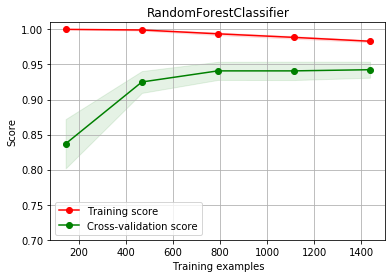

In [45]:
digits = load_digits()
X, y = digits.data, digits.target

####################################################################

title = "RandomForestClassifier"

cv = ShuffleSplit(n_splits=10, 
                  test_size=0.2, 
                  random_state=0)

estimator = model

plot_learning_curve(estimator, 
                    title, 
                    X, 
                    y, 
                    ylim=(0.7, 1.01), 
                    cv=cv)
plt.show()

# Fit

In [46]:
# Preprocessing of training data, fit model 
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor ',
                 ColumnTransformer(n_jobs=-1, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['cssocialsecno_encrypted',
                                                   'customer_tenure',
                                                   'port_in_flag',
    

In [47]:
# Preprocessing of validation data, get predictions
preds = pipeline.predict(X_test)
preds

array([0, 0, 1, ..., 0, 1, 1])

In [48]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', len(y_train))
print('y_test.shape: ', len(y_test))
print()
print('y_train: ', Counter(y_train))
print('y_test: ', Counter(y_test))
print()
print('preds: ', Counter(preds))

X_train.shape:  (88412, 35)
X_test.shape:  (37891, 35)
y_train.shape:  88412
y_test.shape:  37891

y_train:  Counter({0: 87450, 1: 962})
y_test:  Counter({0: 37482, 1: 409})

preds:  Counter({0: 22209, 1: 15682})


# 8) Metricas

# Cross validation

* cross validation options
http://scikit-learn.org/stable/modules/model_evaluation.html

In [49]:
from sklearn.model_selection import cross_val_score

# RandomForestClassifier Mean 0.981308
# gradient boosting Mean 0.981513

#mae using cross validation
scores = cross_val_score(pipeline, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='roc_auc', 
                         n_jobs=-1)

print(scores)
print('Mean %2f' %(scores.mean()))

KeyboardInterrupt: 

# mean_absolute_error - The best value is 0.0

In [50]:
# Evaluate the model
maer = mean_absolute_error(y_test, preds)
print('MAE:', maer)

MAE: 0.41442558919004513


# Confusion matrix

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

* é uma medida de desempenho para o problema de classificação de aprendizado de máquina em que a saída pode ser de duas ou mais classes. É uma tabela com 4 combinações diferentes de valores previstos e reais.

* É extremamente útil para medir Recall, Precisão, Especificidade, Precisão e, o mais importante, Curva AUC-ROC.

* **Verdadeiro positivo**: Você previu positivo e é verdade.

* **Verdadeiro Negativo**: Você previu negativo e é verdade.

* **Falso positivo**: Você previu positivo e é falso.

* **Falso negativo**: Você previu negativo e é falso.



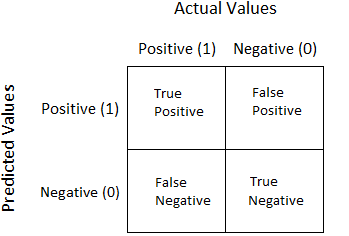

In [51]:
print('preds: ', Counter(preds))
print()

# confusion matrix
conf_matrix = confusion_matrix(y_test, preds)
#print(conf_matrix)

print('               Actual Values')
print('           +--------+--------+')
print('           | Neg(0) | Pos(1) |')
print('p +--------+--------+--------+')
print('r | Neg(0) | ' + str(conf_matrix[0][0]) + '  | ' + str(conf_matrix[0][1]) + '      |')
print('e +--------+--------+--------+')
print('d | Pos(1) | ' + str(conf_matrix[1][0]) + '    | ' + str(conf_matrix[1][1]) + '   |')
print('s +--------+--------+--------+')

preds:  Counter({0: 22209, 1: 15682})

               Actual Values
           +--------+--------+
           | Neg(0) | Pos(1) |
p +--------+--------+--------+
r | Neg(0) | 21994  | 15488      |
e +--------+--------+--------+
d | Pos(1) | 215    | 194   |
s +--------+--------+--------+


# Curva AUC-ROC - Diz quanto modelo é capaz de distinguir entre classes

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

* Quando precisamos verificar ou visualizar o desempenho do problema de classificação de várias classes, usamos a curva ROC ( Área sob a curva ) AUC ( Características Operacionais do Receptor ).
* **ROC** é uma curva de probabilidade e **AUC** representa grau ou medida de separabilidade.
* Quanto maior a **AUC**, melhor o modelo em prever 0s como 0s e 1s como 1s


* Um **modelo excelente tem AUC perto do 1**, o que significa que ele tem uma boa medida de separabilidade. 
* Um **modelo que tem AUC é 0,7** significa que há 70% de chance de que o modelo seja capaz de distinguir entre classe positiva e classe negativa.
* Um **modelo não tem capacidade de separação de classes tem AUC é 0,5**
* Um **modelo ruim tem AUC perto do 0**, o que significa que ele tem a pior medida de separabilidade. 
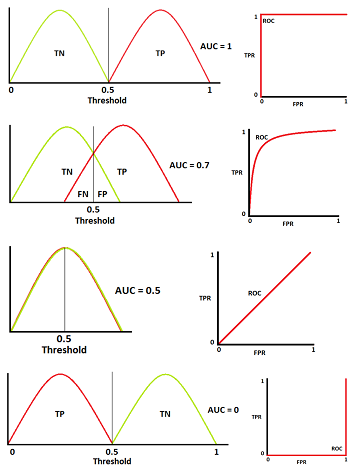

In [52]:
# calculate AUC
aucur = roc_auc_score(y_test, preds)
print('AUC: %.3f' % aucur)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, preds)

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.531


NameError: name 'pyplot' is not defined

# Precision recall - é uma medida do sucesso da previsão quando as classes estão muito desequilibradas
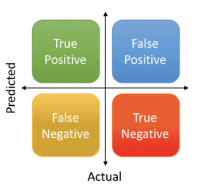

* **Precision** é uma medida da relevância dos resultados, ou seja, **porcentagem de seus resultados que são relevantes**
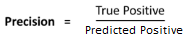

* **Recall** é uma medida de quantos resultados verdadeiramente relevantes são retornados, ou seja, **porcentagem do total de resultados relevantes classificados corretamente pelo seu algoritmo**
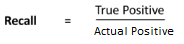

* Um sistema com **alto recall**, mas **baixa Precision** retorna muitos resultados, mas a maioria de seus rótulos previstos está incorreta quando comparada aos rótulos de treinamento. 
* Um sistema com **alta Precision**, mas com **baixa Recall**, é exatamente o oposto, retornando muito poucos resultados, mas a maioria de seus rótulos previstos está correta quando comparada aos rótulos de treinamento. 
* Um sistema ideal com **alta Precision** e **alta Recall** retornará muitos resultados, com todos os resultados rotulados corretamente.

In [53]:
average_precision = average_precision_score(y_test, preds)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.01


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.01')

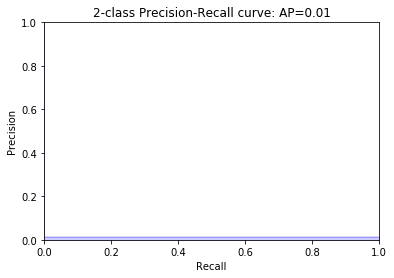

In [54]:
precision, recall, _ = precision_recall_curve(y_test, preds)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters
                                else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

# Classification report

In [ ]:
# classification_report
print(classification_report(y_test, preds))

In [ ]:
print('AUC: %.3f' % aucur)
print('Mean Absolute Error:', maer)